Credit : https://towardsdatascience.com/visualizing-spotify-data-with-python-tableau-687f2f528cdd

Request Data Myspotify > https://www.spotify.com/th-en/account/privacy

In [ ]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import requests

%matplotlib inline
%config InlineBackend.figure_format='retina'

### **Import Data**

Import Data โดยใช้ StreamingHistory0

In [ ]:
# Opening JSON file
f = open('/content/drive/MyDrive/Colab Notebooks/Spotify/MyData_202301/StreamingHistory0.json')

data = json.load(f)

### **Clean and Transform**

ข้อมูลที่ได้ก่อนหน้านี้แสดงออกมาเป็น json จึงต้องทำการแปลงให้เป็น dataframe

Transform data from json --> dataframe

In [ ]:
df = pd.DataFrame(data)
df

,endTime,artistName,trackName,msPlayed
0,2022-01-24 02:19,LambC,Childish,190685
1,2022-01-24 02:23,Martin Smith,Paint on Spring,232653
2,2022-01-24 02:27,CoCo,Sugar Cake (feat. Microdot),214203
3,2022-01-24 02:30,Kisum,You & Me (feat.Jooyoung),194453
4,2022-01-24 02:33,Park Kyung,Inferiority Complex,204376
...,...,...,...,...
4814,2023-01-23 10:45,YENA,SMILEY(Feat. BIBI),78104
4815,2023-01-23 10:48,Brave Girls,RED SUN (With LOTTE DEPARTMENT STORE),203093
4816,2023-01-23 10:51,EXID,FIRE,207013
4817,2023-01-23 10:54,NMIXX,O.O,172936


In [ ]:
# create a 'UniqueID' for each song by combining the fields 'artistName' and 'trackName'
df['UniqueID'] = df['artistName'] + ":" + df['trackName']

df.head()

,endTime,artistName,trackName,msPlayed,UniqueID
0,2022-01-24 02:19,LambC,Childish,190685,LambC:Childish
1,2022-01-24 02:23,Martin Smith,Paint on Spring,232653,Martin Smith:Paint on Spring
2,2022-01-24 02:27,CoCo,Sugar Cake (feat. Microdot),214203,CoCo:Sugar Cake (feat. Microdot)
3,2022-01-24 02:30,Kisum,You & Me (feat.Jooyoung),194453,Kisum:You & Me (feat.Jooyoung)
4,2022-01-24 02:33,Park Kyung,Inferiority Complex,204376,Park Kyung:Inferiority Complex


แปลงค่าเวลา

In [ ]:
df['MinutesListened']  = df['msPlayed']/60000
df

,endTime,artistName,trackName,msPlayed,UniqueID,MinutesListened
0,2022-01-24 02:19,LambC,Childish,190685,LambC:Childish,3.178083
1,2022-01-24 02:23,Martin Smith,Paint on Spring,232653,Martin Smith:Paint on Spring,3.877550
2,2022-01-24 02:27,CoCo,Sugar Cake (feat. Microdot),214203,CoCo:Sugar Cake (feat. Microdot),3.570050
3,2022-01-24 02:30,Kisum,You & Me (feat.Jooyoung),194453,Kisum:You & Me (feat.Jooyoung),3.240883
4,2022-01-24 02:33,Park Kyung,Inferiority Complex,204376,Park Kyung:Inferiority Complex,3.406267
...,...,...,...,...,...,...
4814,2023-01-23 10:45,YENA,SMILEY(Feat. BIBI),78104,YENA:SMILEY(Feat. BIBI),1.301733
4815,2023-01-23 10:48,Brave Girls,RED SUN (With LOTTE DEPARTMENT STORE),203093,Brave Girls:RED SUN (With LOTTE DEPARTMENT STORE),3.384883
4816,2023-01-23 10:51,EXID,FIRE,207013,EXID:FIRE,3.450217
4817,2023-01-23 10:54,NMIXX,O.O,172936,NMIXX:O.O,2.882267


### **EDA**

In [ ]:
cnt_artist = df['artistName'].nunique()

print("Count of Track Name:", cnt_artist)

Count of Track Name: 774


In [ ]:
trackName = df['trackName'].nunique()

print("Count of Track Name :", trackName)

Count of Track Name : 1568


In [ ]:
print("count of listening --> artistName:",df['artistName'].nunique())
df['artistName'].value_counts()

count of listening --> artistName: 774


NewJeans         157
IVE               89
SEVENTEEN         86
Yerin Baek        72
JUNNY             70
                ... 
Navid Tebyani      1
Adrian Habich      1
April 2nd          1
Song Ga In         1
Def.               1
Name: artistName, Length: 774, dtype: int64

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]//2,y[i], ha = 'center',Size=14)    #//2 คือการเซตค่า count ให้อยู่กลาง bar
        #plt.annotate(ha='center', va='bottom')

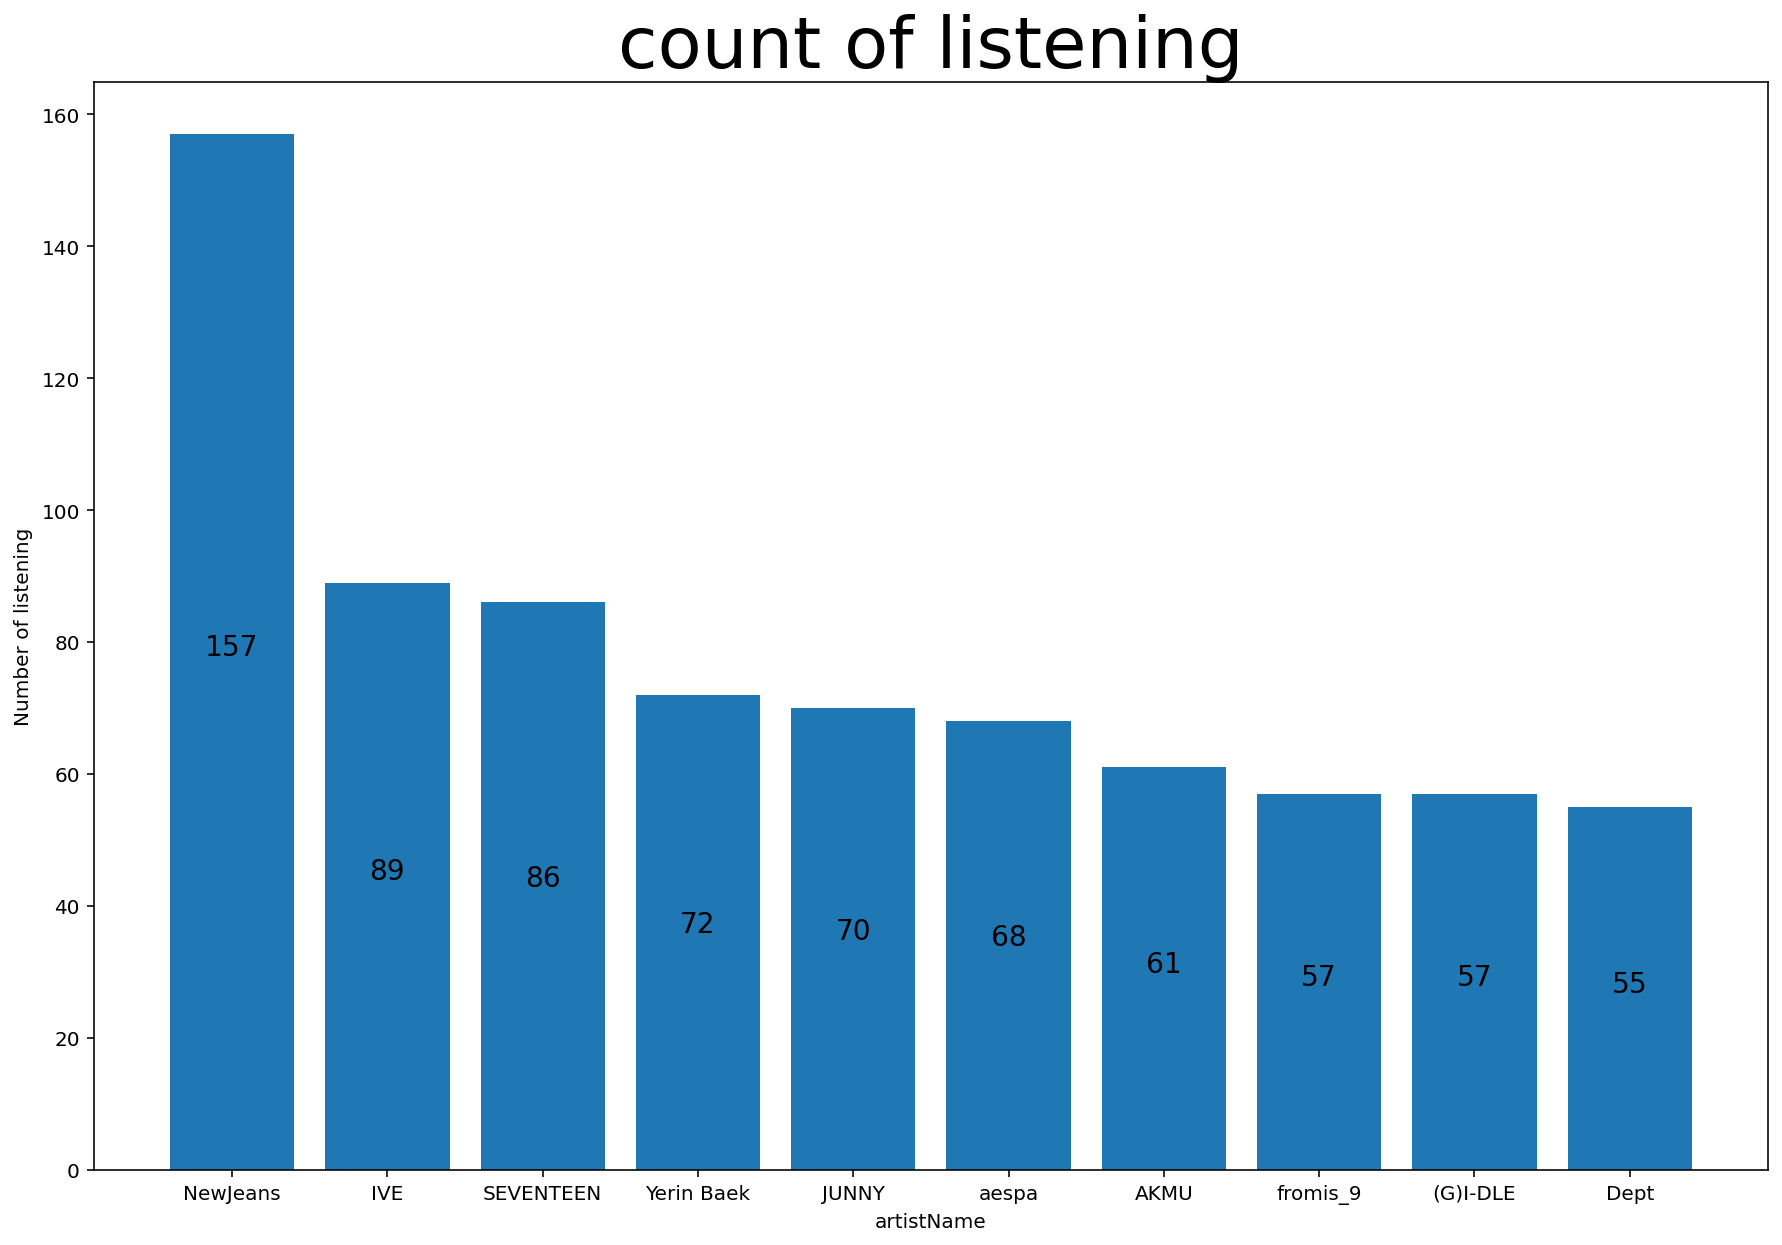

In [ ]:
fig = plt.figure(figsize=(15,10))
y_category = list(df['artistName'].value_counts()[0:10])
x_category = list(df['artistName'].value_counts().index[0:10])
plt.bar(x_category,y_category,width=.8)
plt.xlabel("artistName")
plt.ylabel("Number of listening")
addlabels(x_category, y_category)
plt.title('count of listening',fontdict={'fontsize':36})
plt.show()

In [ ]:
df['trackName'].value_counts()[0:10]

Hype Boy              57
Attention             48
LOVE DIVE             39
FEARLESS              37
SMILEY(Feat. BIBI)    29
TOMBOY                28
Polaroid Love         28
After LIKE            28
Talk that Talk        24
Hurt                  24
Name: trackName, dtype: int64

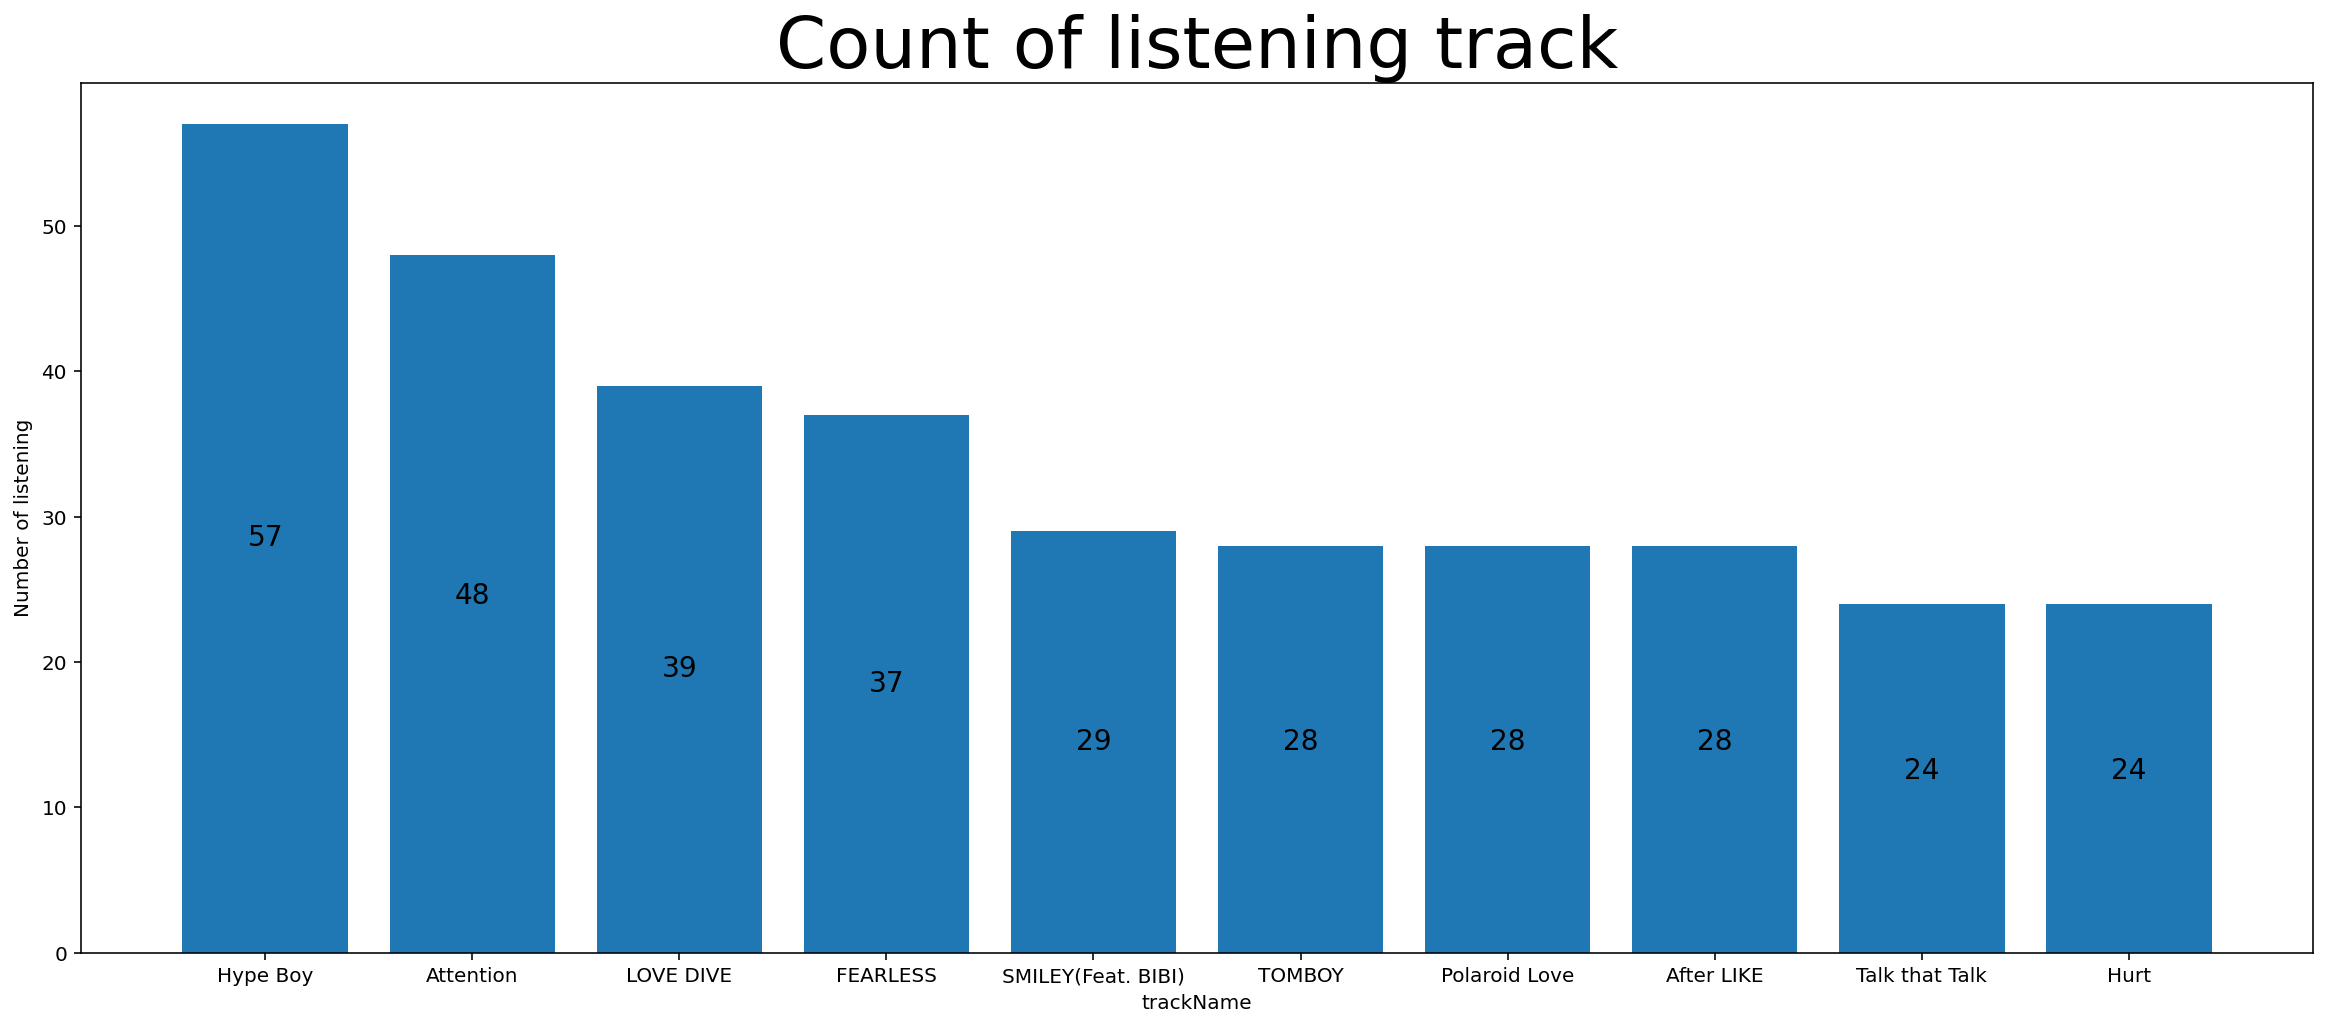

In [ ]:
fig = plt.figure(figsize=(20,8))
y_sub_category = list(df['trackName'].value_counts()[0:10])
x_sub_category = list(df['trackName'].value_counts().index[0:10])
plt.bar(x_sub_category,y_sub_category,width=.8)
plt.xlabel("trackName")
plt.ylabel("Number of listening")
addlabels(x_sub_category, y_sub_category)
plt.title('Count of listening track',fontdict={'fontsize':36})
plt.show()

### **Save File for load into Tableau**

In [ ]:
df.to_csv('MySpotifyDataTable.csv')
print('done')

done


## **Visualization with Tableau**

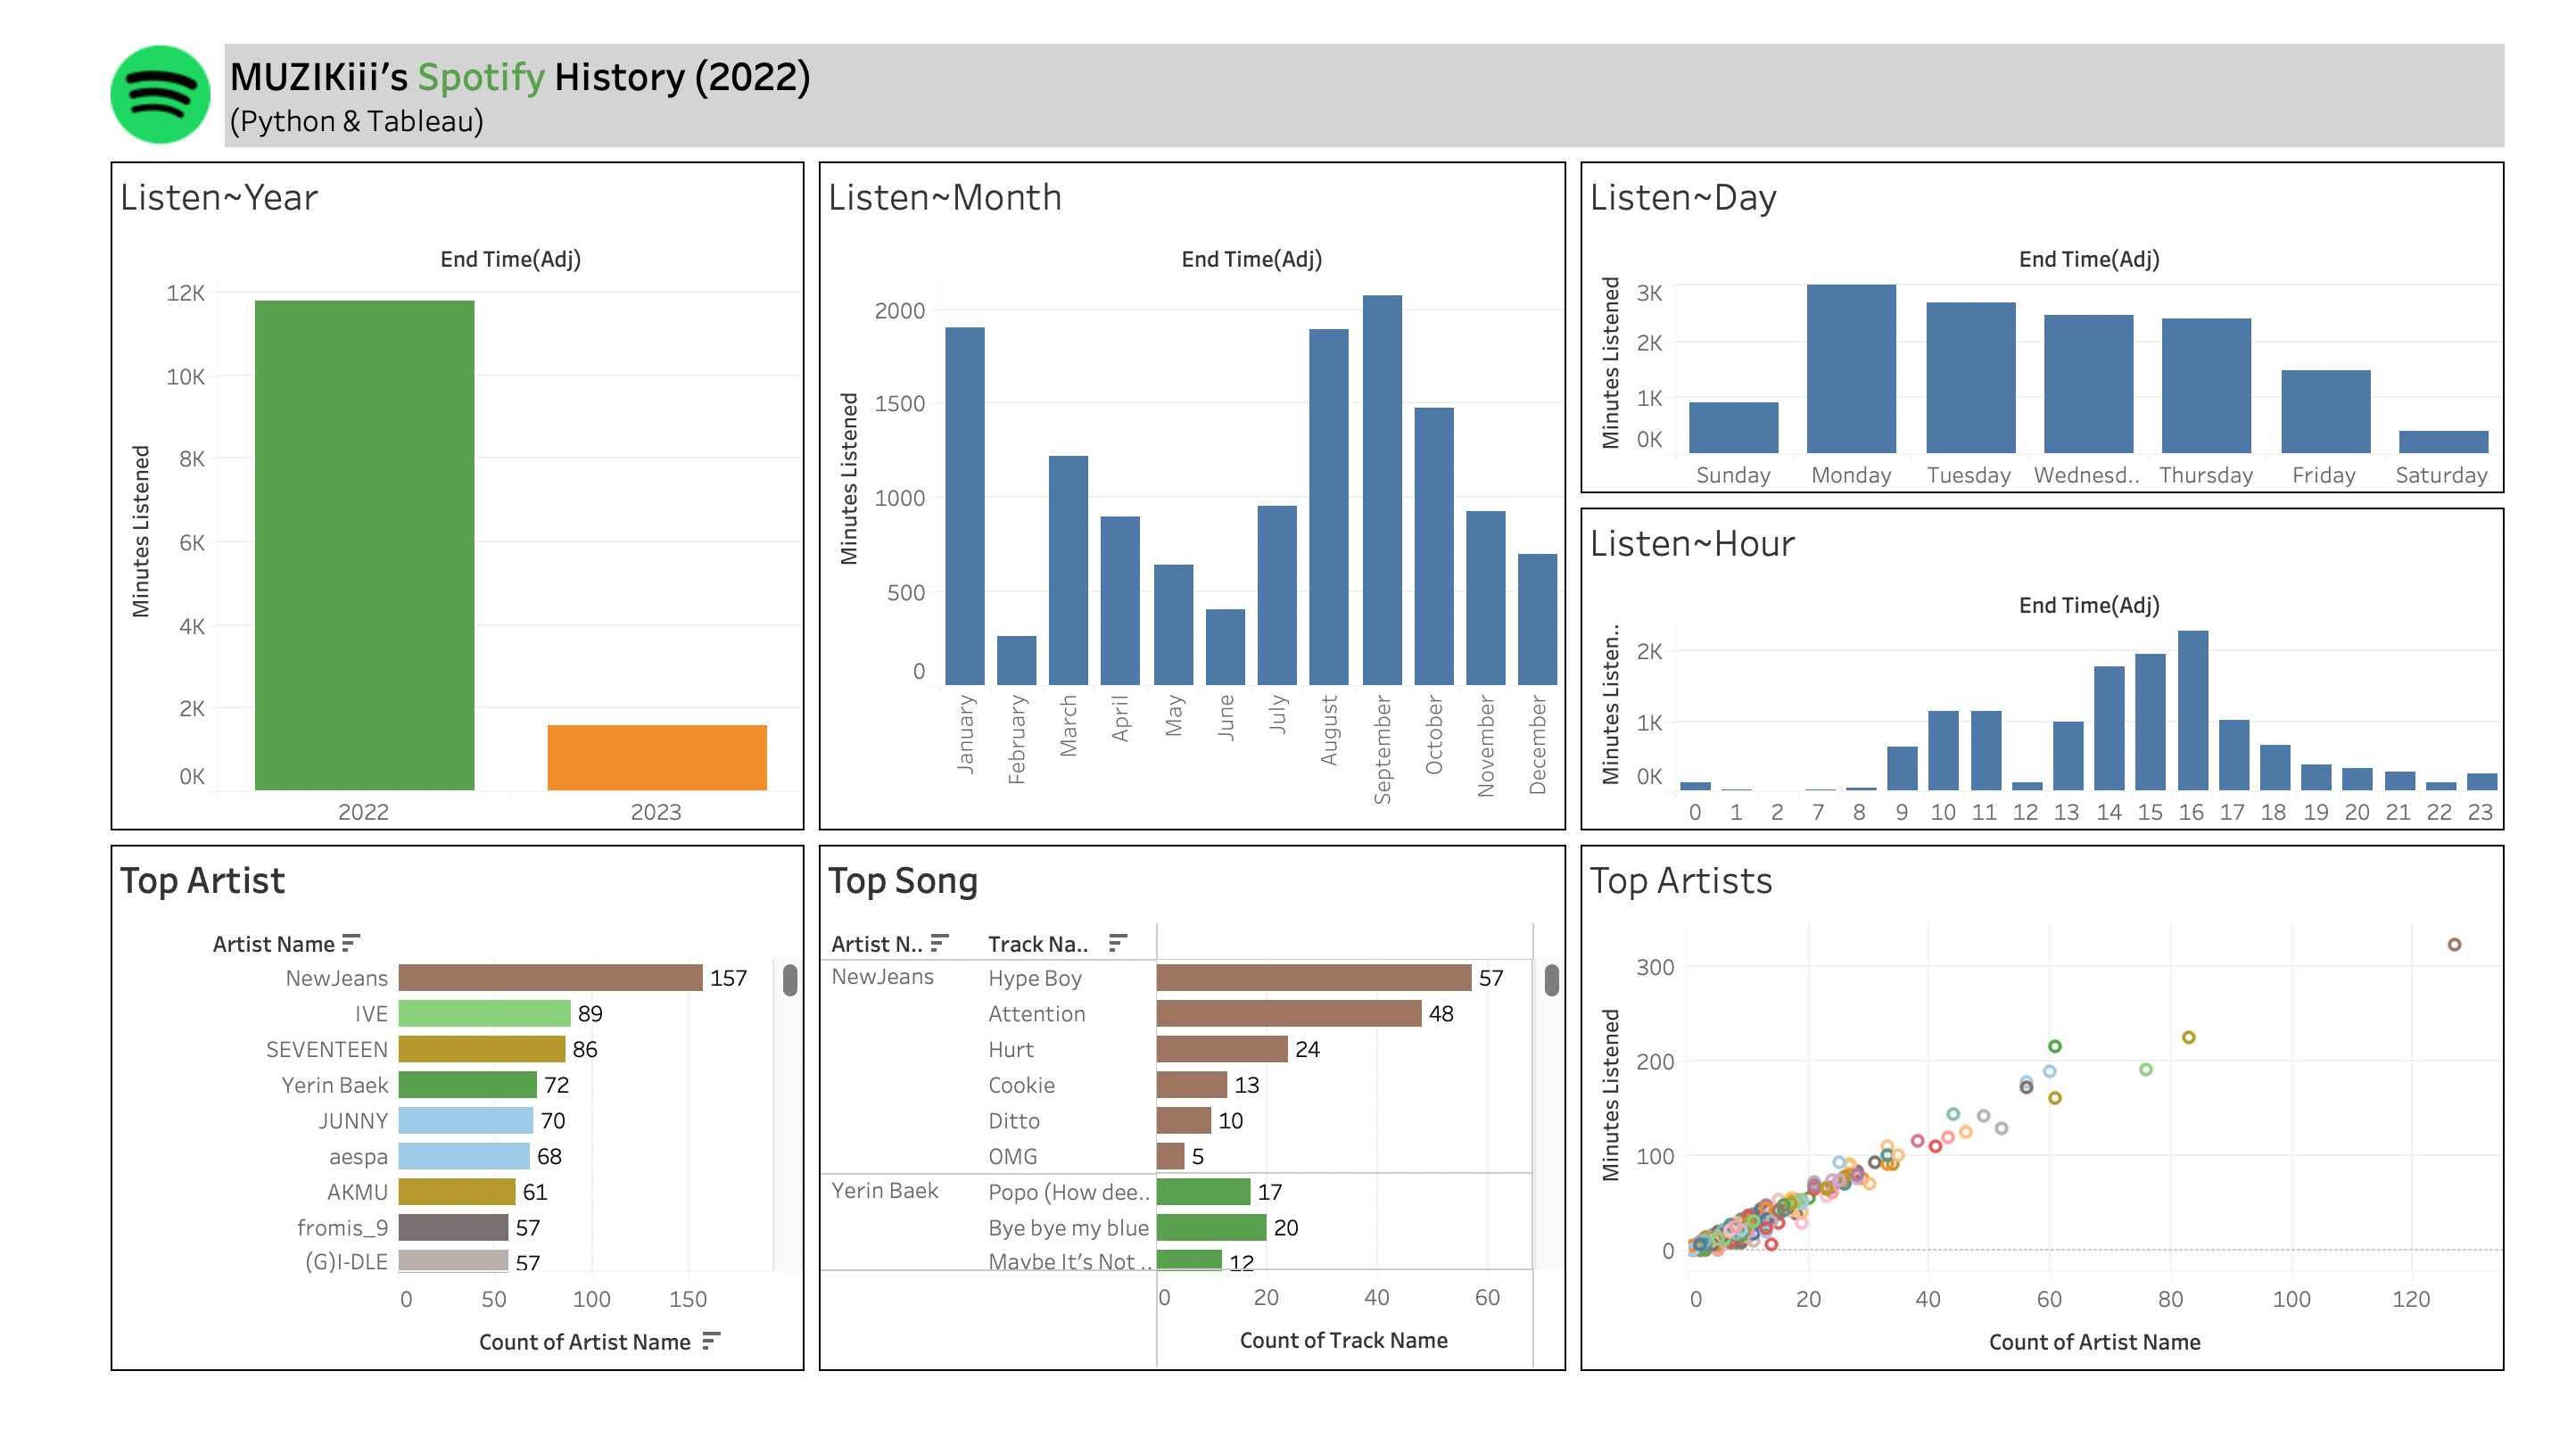